In [89]:
import pandas as pd
import numpy as np
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import cross_val_score

In [3]:
 uploaded = files.upload()

Saving starting_pitching.csv to starting_pitching.csv


In [4]:
starting = pd.read_csv("starting_pitching.csv")

In [5]:
# get rid of all data from the year 2020 
starting = starting.loc[starting.Year != 2020, ]

In [6]:
ml_starting = starting.drop(['Year', 'Tm', 'G'], axis = 1)
ml_starting.head()

,GS,Wgs,Lgs,ND,Wchp,Ltuf,Wtm,Ltm,tmW-L%,Wlst,...,RS/GS,RS/IP,IP/GS,Pit/GS,<80,80-99,100-119,≥120,Max,Playoff
0,162.0,53.0,56.0,53.0,16.0,12.0,82.0,80.0,0.506,14.0,...,5.4,5.2,5.5,92.0,35.0,56.0,64.0,7.0,132.0,0
1,162.0,62.0,53.0,47.0,14.0,13.0,85.0,77.0,0.525,16.0,...,4.9,4.8,6.2,95.0,28.0,67.0,45.0,22.0,145.0,0
2,162.0,76.0,49.0,37.0,18.0,12.0,95.0,67.0,0.586,14.0,...,5.1,4.8,6.4,96.0,23.0,71.0,61.0,7.0,140.0,1
3,162.0,52.0,67.0,43.0,14.0,17.0,74.0,88.0,0.457,20.0,...,5.0,4.9,6.2,102.0,19.0,45.0,67.0,31.0,137.0,0
4,162.0,56.0,54.0,52.0,17.0,14.0,85.0,77.0,0.525,12.0,...,4.9,4.7,5.5,89.0,48.0,67.0,38.0,9.0,134.0,0


## **LOGISTIC REGRESSION**

In [7]:
x = ml_starting.drop('Playoff', axis = 1)
y = ml_starting.Playoff
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [8]:
logreg_model = LogisticRegression(max_iter = 10000)

In [9]:
logreg_model.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [15]:
logreg_predicted = logreg_model.predict(xtest)
logreg_actual = ytest

In [16]:
print(metrics.accuracy_score(logreg_predicted, logreg_actual))

0.9493670886075949


In [17]:
upload = files.upload()

Saving stats_2022.txt to stats_2022.txt


In [18]:
# Provided by Baseball-Reference.com. Generated 8/4/2022.
starting2022 = pd.read_csv('stats_2022.txt')
starting2022.head()

,Tm,G,GS,Wgs,Lgs,ND,Wchp,Ltuf,Wtm,Ltm,...,lDR,RS/GS,RS/IP,IP/GS,Pit/GS,<80,80-99,100-119,≥120,Max
0,Arizona Diamondbacks,104,104,27,32,45,11,3,46,58,...,58,4.3,4.0,5.2,86,30,56,18,0,115
1,Atlanta Braves,105,105,44,28,33,16,3,63,42,...,62,4.9,4.7,5.5,90,20,61,24,0,107
2,Baltimore Orioles,105,105,26,29,50,11,4,54,51,...,54,4.3,3.7,4.8,79,46,49,10,0,117
3,Boston Red Sox,106,106,30,32,44,10,3,53,53,...,58,4.5,4.3,4.9,80,46,49,11,0,112
4,Chicago Cubs,102,102,21,40,41,10,2,41,61,...,57,4.2,4.6,4.7,80,38,56,8,0,116


In [19]:
to_numeric_columns = ['G','GS','Wgs','Lgs','ND','Wchp','Ltuf','Wtm','Ltm','Wlst','Lsv','CG','SHO','QS','GmScA','Best','Wrst','BQR','BQS','sDR','lDR','Pit/GS','<80','80-99','100-119','≥120','Max', 'tmW-L%','RS/GS','RS/IP','IP/GS']

In [20]:
# convert columns to appropriate data types
starting2022[to_numeric_columns] = starting2022[to_numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)
starting2022['QS%'] = starting2022['QS%'].map(lambda x: x.rstrip('%')).astype('int') / 100

In [21]:
# adjust certain columns to represent full season by multiplying them by 162 / G
target_columns = [col not in ['Tm', 'G', 'tmW-L%','RS/GS','RS/IP','IP/GS', 'QS%'] for col in starting2022.columns]
for col in starting2022.columns[target_columns]:
    starting2022[col] = starting2022[col] * (162.0 / starting2022.G)

In [22]:
starting2022

,Tm,G,GS,Wgs,Lgs,ND,Wchp,Ltuf,Wtm,Ltm,...,lDR,RS/GS,RS/IP,IP/GS,Pit/GS,<80,80-99,100-119,≥120,Max
0,Arizona Diamondbacks,104.0,162.0,42.057692,49.846154,70.096154,17.134615,4.673077,71.653846,90.346154,...,90.346154,4.3,4.0,5.2,133.961538,46.730769,87.230769,28.038462,0.000000,179.134615
1,Atlanta Braves,105.0,162.0,67.885714,43.200000,50.914286,24.685714,4.628571,97.200000,64.800000,...,95.657143,4.9,4.7,5.5,138.857143,30.857143,94.114286,37.028571,0.000000,165.085714
2,Baltimore Orioles,105.0,162.0,40.114286,44.742857,77.142857,16.971429,6.171429,83.314286,78.685714,...,83.314286,4.3,3.7,4.8,121.885714,70.971429,75.600000,15.428571,0.000000,180.514286
3,Boston Red Sox,106.0,162.0,45.849057,48.905660,67.245283,15.283019,4.584906,81.000000,81.000000,...,88.641509,4.5,4.3,4.9,122.264151,70.301887,74.886792,16.811321,0.000000,171.169811
4,Chicago Cubs,102.0,162.0,33.352941,63.529412,65.117647,15.882353,3.176471,65.117647,96.882353,...,90.529412,4.2,4.6,4.7,127.058824,60.352941,88.941176,12.705882,0.000000,184.235294
5,Chicago White Sox,104.0,162.0,49.846154,59.192308,52.961538,21.807692,10.903846,82.557692,79.442308,...,101.250000,4.4,3.8,5.2,138.634615,29.596154,95.019231,37.384615,0.000000,183.807692
6,Cincinnati Reds,104.0,162.0,37.384615,73.211538,51.403846,12.461538,9.346154,65.423077,96.576923,...,95.019231,4.4,3.8,5.1,140.192308,37.384615,73.211538,49.846154,1.557692,191.596154
7,Cleveland Guardians,104.0,162.0,38.942308,57.634615,65.423077,7.788462,14.019231,84.115385,77.884615,...,116.826923,4.5,4.3,5.5,137.076923,32.711538,115.269231,14.019231,0.000000,169.788462
8,Colorado Rockies,107.0,162.0,42.392523,63.588785,56.018692,6.056075,9.084112,69.644860,92.355140,...,101.439252,4.5,4.0,5.3,133.233645,30.280374,107.495327,24.224299,0.000000,162.000000
9,Detroit Tigers,106.0,162.0,29.037736,68.773585,64.188679,10.698113,4.584906,64.188679,97.811321,...,90.169811,3.3,2.8,4.8,122.264151,65.716981,85.584906,10.698113,0.000000,165.056604


In [23]:
# create dataframe for ML 
ml_starting2022 = starting2022.drop(["Tm", "G"], axis = 1)

In [24]:
print(ml_starting.shape)
print(ml_starting2022.shape )

(630, 32)
(30, 31)


In [25]:
# use 2022 dataset to predict which MLB teams will make playoffs
logreg_predictions2022 = logreg_model.predict(ml_starting2022)

In [26]:
# create dataframe of predictions produced by logistic regression
logreg_playoff_predictions2022 = pd.DataFrame({'2022 Teams': starting2022.Tm, 'Playoff Prediction': logreg_predictions2022})

In [27]:
logreg_playoff_teams2022 = logreg_playoff_predictions2022.loc[logreg_playoff_predictions2022['Playoff Prediction'] == 1, '2022 Teams']
len(logreg_playoff_teams2022)

5

In [28]:
playoff_teams = Counter()
for rep in range(50):
  xtrain, xtest, ytrain, ytest = train_test_split(x,y)
  logreg_model = LogisticRegression(max_iter = 10000)
  logreg_model.fit(xtrain, ytrain)
  predictions2022 = logreg_model.predict(ml_starting2022)
  predictions_table = pd.DataFrame({'2022 Teams':starting2022.Tm, 'Playoff Prediction':predictions2022})
  playoff_teams2022 = predictions_table.loc[predictions_table['Playoff Prediction'] == 1, '2022 Teams']
  playoff_teams.update(list(playoff_teams2022))

In [29]:
pd.DataFrame({'Team':playoff_teams.keys(), '# of Predicted Appearances In Playoffs':playoff_teams.values()}).sort_values(by = '# of Predicted Appearances In Playoffs', ascending = False)

,Team,# of Predicted Appearances In Playoffs
10,New York Yankees,47
6,Los Angeles Dodgers,47
5,Houston Astros,45
9,New York Mets,39
0,Atlanta Braves,33
12,San Diego Padres,30
16,Toronto Blue Jays,27
11,Philadelphia Phillies,23
7,Milwaukee Brewers,20
13,Seattle Mariners,17


### So What is this Logistic Regression Model doing?
- The Logreg model creates a function that contains coefficients, or predicted weights, to predict an outcome given a set of data. In this case, the logreg model takes in data from previous MLB seasons to gather metrics such as QS% and Pit/GS and uses these quantities as coefficients in its generated function to predict which team is most likely to make playoffs. 

## **Decision Tree**

In [30]:
# create test and train datasets
x2 = ml_starting.drop('Playoff', axis = 1)
y2 = ml_starting.Playoff
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2)

In [31]:
dt_model = tree.DecisionTreeClassifier()
dt_model = dt_model.fit(xtrain2,ytrain2)

In [32]:
dt_predicted = dt_model.predict(xtest2)
dt_actual = ytest2

In [33]:
print(metrics.accuracy_score(dt_predicted, dt_actual))

0.8481012658227848


In [34]:
# use 2022 dataset and Decision Tree Model to predict which MLB teams will make playoffs
dt_predictions2022 = dt_model.predict(ml_starting2022)

In [35]:
dt_playoff_predictions2022 = pd.DataFrame({'2022 Teams': starting2022.Tm, 'Playoff Prediction': dt_predictions2022})
dt_playoff_teams2022 = dt_playoff_predictions2022.loc[dt_playoff_predictions2022['Playoff Prediction'] == 1, '2022 Teams']

In [36]:
dt_playoff_teams = Counter()
for rep in range(50):
  xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2,y2)
  dt_model = tree.DecisionTreeClassifier()
  dt_model.fit(xtrain2, ytrain2)
  dt_predictions2022 = dt_model.predict(ml_starting2022)
  dt_predictions_table = pd.DataFrame({'2022 Teams':starting2022.Tm, 'Playoff Prediction':dt_predictions2022})
  dt_playoff_teams2022 = dt_predictions_table.loc[dt_predictions_table['Playoff Prediction'] == 1, '2022 Teams']
  dt_playoff_teams.update(list(dt_playoff_teams2022))

In [37]:
dt_prediction_df= pd.DataFrame({'Team':dt_playoff_teams.keys(), '# of Predicted Appearances In Playoffs':dt_playoff_teams.values()}).sort_values(by = '# of Predicted Appearances In Playoffs', ascending = False)
dt_prediction_df

,Team,# of Predicted Appearances In Playoffs
2,Los Angeles Dodgers,50
5,New York Yankees,50
1,Houston Astros,50
4,New York Mets,47
7,San Diego Padres,45
0,Atlanta Braves,43
8,Seattle Mariners,27
3,Milwaukee Brewers,26
9,St. Louis Cardinals,26
10,Toronto Blue Jays,25


### So What is the Decision Tree Model doing?
A decision tree model simply put is a piecewise constant approximation method. The model does this by learning from the data that its given to approximate a sin curve by creating its own if-else decisions. In this case, the decision tree model takes in the metrics of the MLB data given, and formulates its own decision rules for each data feature and finally predicts the value of a target variable by doing so.

## **K Nearest Neighbors**

In [121]:
# prepare and split data 
scaler = StandardScaler()
x3 = ml_starting.drop('Playoff', axis = 1)
y3 = ml_starting.Playoff
x_scaled = scaler.fit_transform(x3)
pd.DataFrame(x_scaled).sample(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
391,0.132708,1.055227,-0.572495,-0.733775,-0.468320,1.466188,1.262542,-1.259919,1.266345,-0.730235,...,0.425332,-0.589566,-0.594691,0.891851,0.300652,-1.334823,1.445180,-0.144055,-0.569323,-0.146813
439,0.132708,0.605130,-0.572495,-0.121161,-0.009468,1.466188,0.590538,-0.586609,0.585503,-0.464772,...,0.132880,-0.212674,-0.246983,0.891851,0.501511,-1.252192,0.783891,0.316110,-0.569323,-0.283233
311,0.132708,-0.295063,0.634438,-0.366207,-0.927172,1.896616,-0.417470,0.423357,-0.422144,-0.730235,...,0.352219,-1.531795,-1.811669,0.626068,1.304949,-0.921667,-1.464494,1.543215,0.635628,-0.010394
249,0.132708,-0.295063,0.131549,0.246407,0.908236,-1.762022,-0.585471,0.591685,-0.585546,1.658935,...,0.425332,0.918000,0.622287,0.094501,0.300652,-0.177985,-0.340302,0.418368,-0.167673,0.808122
481,-3.082917,-1.375295,0.735016,0.859021,-0.697746,-0.470738,-1.089475,1.012504,-1.062136,-0.995698,...,-0.305798,-1.154903,-1.463961,-0.702849,-0.703646,0.483065,0.188730,-0.348573,-0.569323,-0.556071


In [122]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_scaled, y3)

KNeighborsClassifier(n_neighbors=2)

In [123]:
scaled_data = pd.DataFrame(x_scaled)
scaled_data["Playoff"] = ml_starting.Playoff
rand_sample = scaled_data.sample(1)
rand_sample

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Playoff
46,0.132708,0.425091,-0.069606,-0.48873,-0.697746,-1.11638,0.338536,-0.334117,0.3404,-0.464772,...,0.352663,0.448433,0.891851,0.300652,-0.260616,-0.075786,0.213851,0.033152,0.535283,0.0


In [183]:
# code from DSU curriculum
mean_fold_errors = []

for num_neighbors in range(1, 20):
    np.random.seed(0)   # to ensure we use the same random folds
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    fold_errors = 1 - cross_val_score(knn, x_scaled, y3, cv = 5)   # 5-fold CV
    mean_fold_errors.append(np.mean(fold_errors))

    print("Num neighbors =", num_neighbors)
    print("K-fold CV errors:", np.round(fold_errors, 3))
    print("K-fold CV mean error:", np.round(mean_fold_errors[-1], 3))
    print("–"*50)

Num neighbors = 1
K-fold CV errors: [0.214 0.151 0.175 0.103 0.143]
K-fold CV mean error: 0.157
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 2
K-fold CV errors: [0.19  0.167 0.167 0.119 0.175]
K-fold CV mean error: 0.163
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 3
K-fold CV errors: [0.095 0.151 0.119 0.079 0.135]
K-fold CV mean error: 0.116
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 4
K-fold CV errors: [0.111 0.167 0.135 0.111 0.151]
K-fold CV mean error: 0.135
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 5
K-fold CV errors: [0.159 0.159 0.127 0.103 0.135]
K-fold CV mean error: 0.137
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 6
K-fold CV errors: [0.151 0.151 0.119 0.159 0.167]
K-fold CV mean error: 0.149
––––––––––––––––––––––––––––––––––––––––––––––––––
Num neighbors = 7
K-fold CV errors: [0.151 0.151 0.127 0.143 0.159]
K-fold CV mean error: 0.146
––––––––––––––––––––––

In [184]:
# choose optimal k-neighbors and build final model
final_knn = KNeighborsClassifier(n_neighbors=3)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x_scaled, y3, test_size=0.2)
final_knn.fit(xtrain3, ytrain3)

KNeighborsClassifier(n_neighbors=3)

Accuracy: 81.75%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


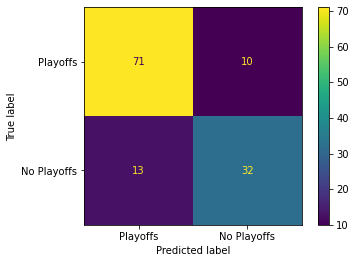

<Figure size 720x576 with 0 Axes>

In [185]:
# visualization of model performance and accuracy
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(f"Accuracy: {final_knn.score(xtest3, ytest3)*100:.2f}%")
plot_confusion_matrix(final_knn, xtest3, ytest3, display_labels=["Playoffs", "No Playoffs"])
plt.figure(figsize=(10,8))
plt.show()

In [189]:
knn_prediction2022 = final_knn.predict(scaler.transform(ml_starting2022))
knn_prediction_teams = starting2022.Tm[knn_prediction2022 == 1]

In [190]:
knn_prediction2022

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0])

### So What is the KNN model doing?
The KNN algorithm assings its own 'label' to a new datapoint that it is given based on the labels of *k* closest training data points. In this case, the algorithm is given a MLB data set, which causes the algorithm to create its own clusters based on how similar the datapoints are to each other. 